# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
# Define your OpenWeatherMap API key
api_key = weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | male
Processing Record 5 of Set 1 | palu
Processing Record 6 of Set 1 | betio village
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | burang
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | hayma'
City not found. Skipping...
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bubaque
Processing Record 15 of Set 1 | tamanrasset
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | dalandzadgad
Processing Record 21 of Set 1 | general

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.78,93,100,5.13,TF,1712806946
1,saint-philippe,-21.3585,55.7679,24.77,79,75,4.13,RE,1712806947
2,hawaiian paradise park,19.5933,-154.9731,23.73,87,100,3.60,US,1712806947
3,male,4.1748,73.5089,31.97,74,40,2.57,MV,1712806948
4,palu,-0.8917,119.8707,31.65,69,63,1.53,ID,1712806949


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv('../output_data/cities.csv', index_label='City_ID')

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.78,93,100,5.13,TF,1712806946
1,saint-philippe,-21.3585,55.7679,24.77,79,75,4.13,RE,1712806947
2,hawaiian paradise park,19.5933,-154.9731,23.73,87,100,3.60,US,1712806947
3,male,4.1748,73.5089,31.97,74,40,2.57,MV,1712806948
4,palu,-0.8917,119.8707,31.65,69,63,1.53,ID,1712806949


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

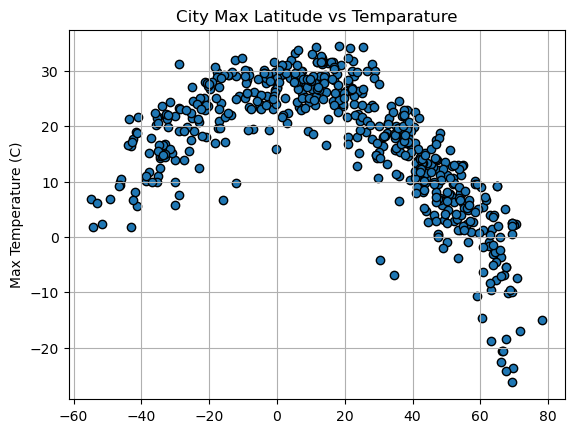

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors= "black")
# Incorporate the other graph properties
plt.title("City Max Latitude vs Temparature") 
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

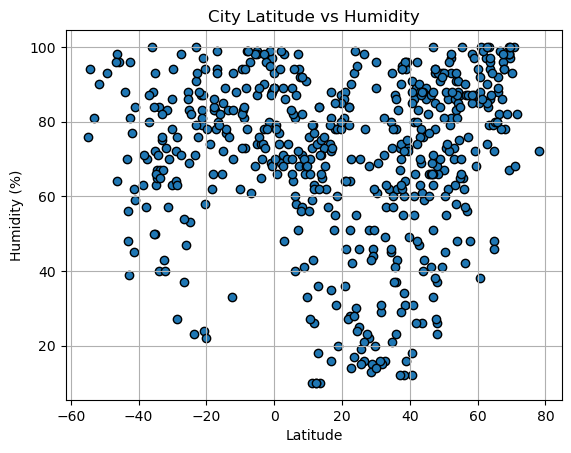

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity") 
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

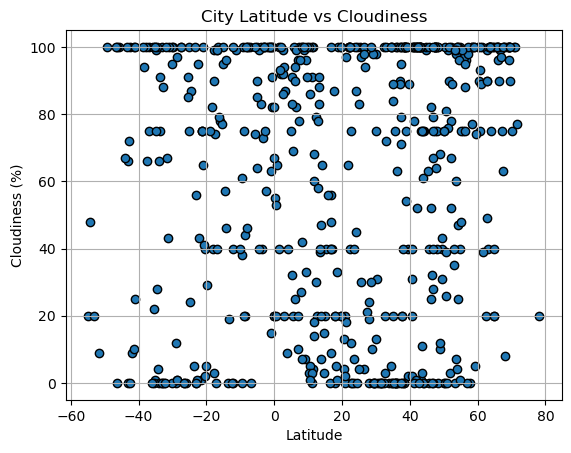

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

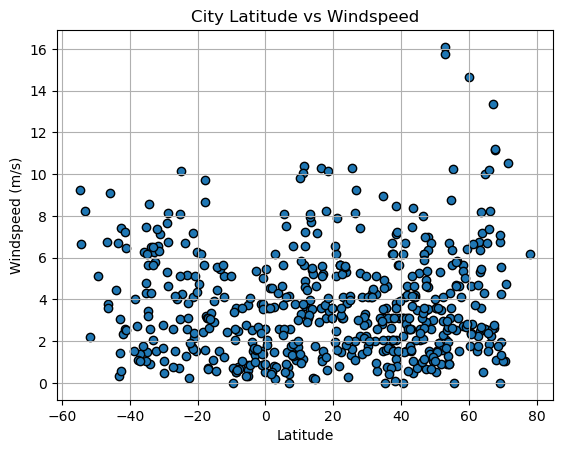

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Windspeed") 
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    regress_values = x * slope + intercept
    return regress_values, slope, intercept, rvalue, pvalue, stderr

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hawaiian paradise park,19.5933,-154.9731,23.73,87,100,3.60,US,1712806947
3,male,4.1748,73.5089,31.97,74,40,2.57,MV,1712806948
5,betio village,1.3580,172.9211,31.02,77,100,4.54,KI,1712806949
6,talnakh,69.4865,88.3972,-23.60,97,90,1.98,RU,1712806950
7,crane,31.3974,-102.3501,16.50,29,0,4.29,US,1712806950


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.78,93,100,5.13,TF,1712806946
1,saint-philippe,-21.3585,55.7679,24.77,79,75,4.13,RE,1712806947
4,palu,-0.8917,119.8707,31.65,69,63,1.53,ID,1712806949
9,puerto natales,-51.7236,-72.4875,2.33,90,9,2.18,CL,1712806951
14,puerto ayora,-0.7393,-90.3518,24.75,97,82,1.40,EC,1712806954


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.8739009790840382


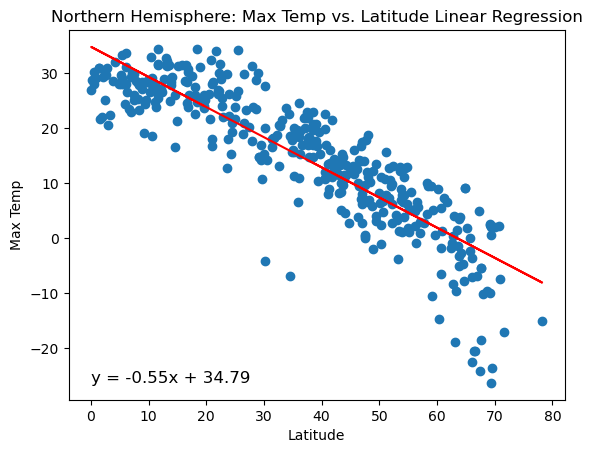

In [35]:
# Linear regression on Northern Hemisphere
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    return regress_values, slope, intercept, rvalue, pvalue, stderr
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression
(regress_values, slope, intercept, rvalue, pvalue, std_err) = linear_regression(x=x_values, y=y_values)
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.text(x_values.min(), y_values.min(), regression_line, color='black', fontsize=12)
# Print the R-value
print(f"R-value: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.show()


R-value (Southern Hemisphere): 0.718287828194192


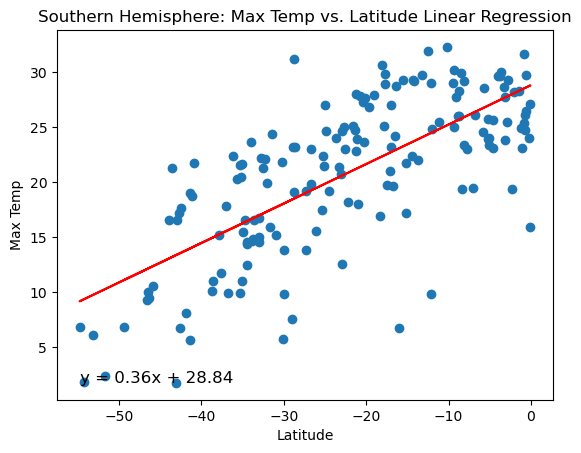

In [36]:
# Linear regression on Southern Hemisphere
outhern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Get x and y values for the Southern Hemisphere analysis
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
# Perform linear regression for the Southern Hemisphere
regress_values_southern, slope_southern, intercept_southern, rvalue_southern, pvalue_southern, std_err_southern = linear_regression(x=x_values_southern, y=y_values_southern)
# Create the regression line equation for the Southern Hemisphere
regression_line_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"
# Print the R-value for the Southern Hemisphere
print(f"R-value (Southern Hemisphere): {rvalue_southern}")
# Plot the scatter plot and regression line for the Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, color='red')
# Add the regression equation to the plot for the Southern Hemisphere
plt.text(x_values_southern.min(), y_values_southern.min(), regression_line_southern, color='black', fontsize=12)
# Set plot labels and title for the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
# Show the plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Humidity vs. Latitude): 0.26450900344504313


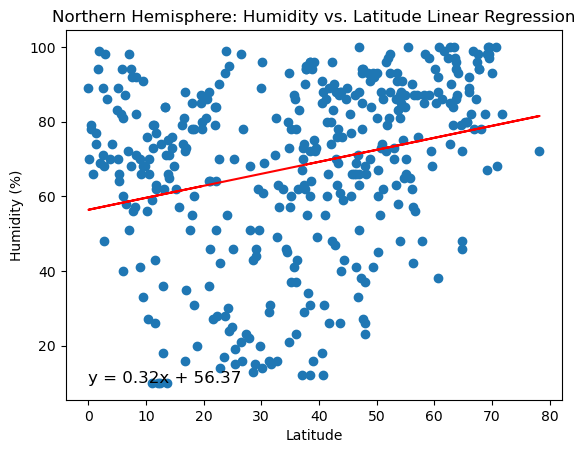

In [37]:
# Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]
# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
regress_values_northern_humidity, slope_northern_humidity, intercept_northern_humidity, rvalue_northern_humidity, pvalue_northern_humidity, std_err_northern_humidity = linear_regression(x=x_values_northern_humidity, y=y_values_northern_humidity)
# Create the regression line equation for Humidity vs. Latitude in the Northern Hemisphere
regression_line_northern_humidity = f"y = {round(slope_northern_humidity, 2)}x + {round(intercept_northern_humidity, 2)}"
# Print the R-value for Humidity vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Humidity vs. Latitude): {rvalue_northern_humidity}")
# Plot the scatter plot and regression line for Humidity vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_humidity, y_values_northern_humidity)
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, color='red')
# Add the regression equation to the plot for Humidity vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_humidity.min(), y_values_northern_humidity.min(), regression_line_northern_humidity, color='black', fontsize=12)
# Set plot labels and title for Humidity vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')
# Show the plot for Humidity vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Humidity vs. Latitude): 0.23448691260981577


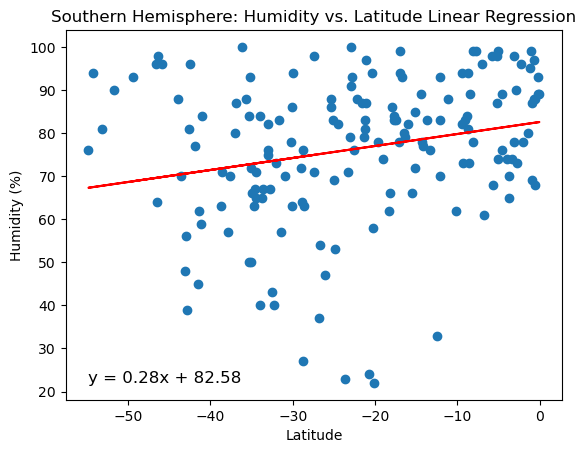

In [38]:
# Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]
# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
regress_values_southern_humidity, slope_southern_humidity, intercept_southern_humidity, rvalue_southern_humidity, pvalue_southern_humidity, std_err_southern_humidity = linear_regression(x=x_values_southern_humidity, y=y_values_southern_humidity)
# Create the regression line equation for Humidity vs. Latitude in the Southern Hemisphere
regression_line_southern_humidity = f"y = {round(slope_southern_humidity, 2)}x + {round(intercept_southern_humidity, 2)}"
# Print the R-value for Humidity vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Humidity vs. Latitude): {rvalue_southern_humidity}")
# Plot the scatter plot and regression line for Humidity vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_humidity, y_values_southern_humidity)
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, color='red')
# Add the regression equation to the plot for Humidity vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_humidity.min(), y_values_southern_humidity.min(), regression_line_southern_humidity, color='black', fontsize=12)
# Set plot labels and title for Humidity vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')
# Show the plot for Humidity vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Cloudiness vs. Latitude): 0.2036154067524803


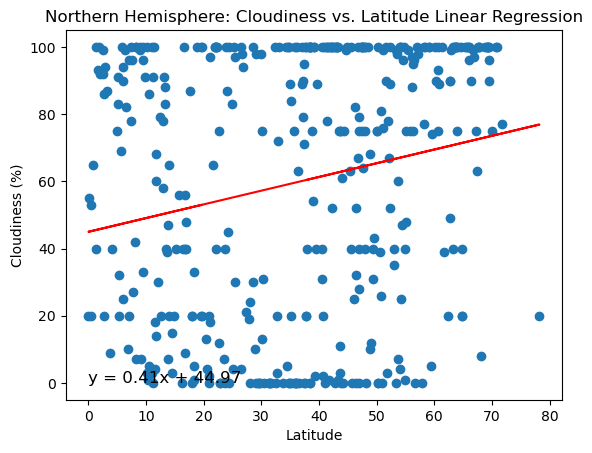

In [39]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]
# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
regress_values_northern_cloudiness, slope_northern_cloudiness, intercept_northern_cloudiness, rvalue_northern_cloudiness, pvalue_northern_cloudiness, std_err_northern_cloudiness = linear_regression(x=x_values_northern_cloudiness, y=y_values_northern_cloudiness)
# Create the regression line equation for Cloudiness vs. Latitude in the Northern Hemisphere
regression_line_northern_cloudiness = f"y = {round(slope_northern_cloudiness, 2)}x + {round(intercept_northern_cloudiness, 2)}"
# Print the R-value for Cloudiness vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Cloudiness vs. Latitude): {rvalue_northern_cloudiness}")
# Plot the scatter plot and regression line for Cloudiness vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness)
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, color='red')
# Add the regression equation to the plot for Cloudiness vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_cloudiness.min(), y_values_northern_cloudiness.min(), regression_line_northern_cloudiness, color='black', fontsize=12)
# Set plot labels and title for Cloudiness vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')
# Show the plot for Cloudiness vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Cloudiness vs. Latitude): 0.15977615840118398


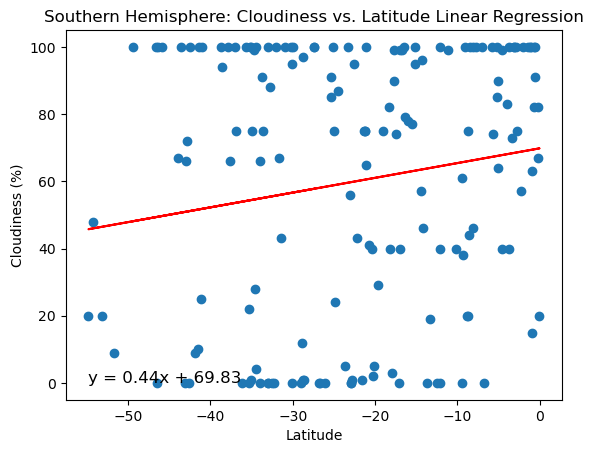

In [40]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]
# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
regress_values_southern_cloudiness, slope_southern_cloudiness, intercept_southern_cloudiness, rvalue_southern_cloudiness, pvalue_southern_cloudiness, std_err_southern_cloudiness = linear_regression(x=x_values_southern_cloudiness, y=y_values_southern_cloudiness)
# Create the regression line equation for Cloudiness vs. Latitude in the Southern Hemisphere
regression_line_southern_cloudiness = f"y = {round(slope_southern_cloudiness, 2)}x + {round(intercept_southern_cloudiness, 2)}"
# Print the R-value for Cloudiness vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Cloudiness vs. Latitude): {rvalue_southern_cloudiness}")
# Plot the scatter plot and regression line for Cloudiness vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness)
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, color='red')
# Add the regression equation to the plot for Cloudiness vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_cloudiness.min(), y_values_southern_cloudiness.min(), regression_line_southern_cloudiness, color='black', fontsize=12)
# Set plot labels and title for Cloudiness vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')
# Show the plot for Cloudiness vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Wind Speed vs. Latitude): 0.10256074500652085


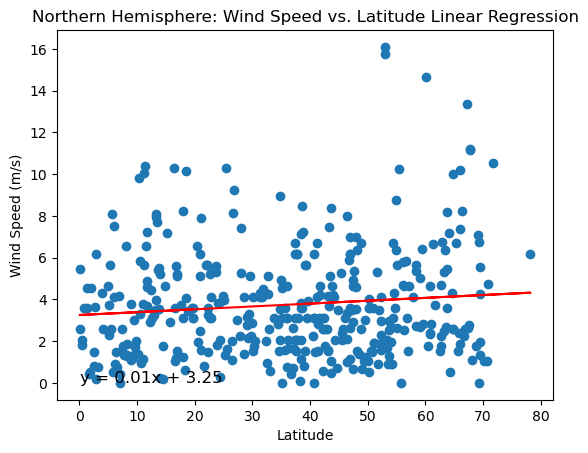

In [41]:
# Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]

# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
regress_values_northern_wind, slope_northern_wind, intercept_northern_wind, rvalue_northern_wind, pvalue_northern_wind, std_err_northern_wind = linear_regression(x=x_values_northern_wind, y=y_values_northern_wind)

# Create the regression line equation for Wind Speed vs. Latitude in the Northern Hemisphere
regression_line_northern_wind = f"y = {round(slope_northern_wind, 2)}x + {round(intercept_northern_wind, 2)}"

# Print the R-value for Wind Speed vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Wind Speed vs. Latitude): {rvalue_northern_wind}")
# Plot the scatter plot and regression line for Wind Speed vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_wind, y_values_northern_wind)
plt.plot(x_values_northern_wind, regress_values_northern_wind, color='red')
# Add the regression equation to the plot for Wind Speed vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_wind.min(), y_values_northern_wind.min(), regression_line_northern_wind, color='black', fontsize=12)
# Set plot labels and title for Wind Speed vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')
# Show the plot for Wind Speed vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Wind Speed vs. Latitude): -0.37772222727410076


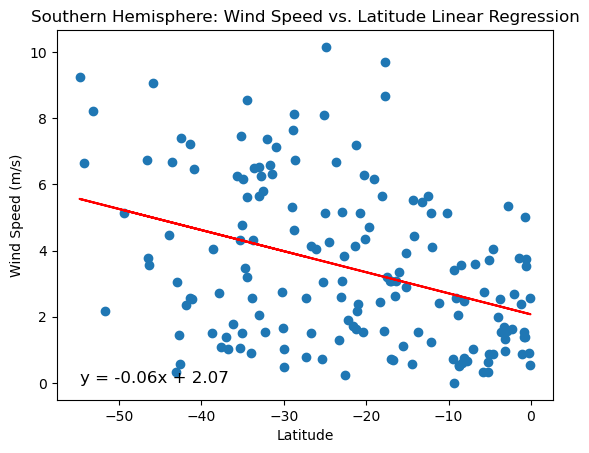

In [42]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]
# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
regress_values_southern_wind, slope_southern_wind, intercept_southern_wind, rvalue_southern_wind, pvalue_southern_wind, std_err_southern_wind = linear_regression(x=x_values_southern_wind, y=y_values_southern_wind)
# Create the regression line equation for Wind Speed vs. Latitude in the Southern Hemisphere
regression_line_southern_wind = f"y = {round(slope_southern_wind, 2)}x + {round(intercept_southern_wind, 2)}"
# Print the R-value for Wind Speed vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Wind Speed vs. Latitude): {rvalue_southern_wind}")
# Plot the scatter plot and regression line for Wind Speed vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_wind, y_values_southern_wind)
plt.plot(x_values_southern_wind, regress_values_southern_wind, color='red')
# Add the regression equation to the plot for Wind Speed vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_wind.min(), y_values_southern_wind.min(), regression_line_southern_wind, color='black', fontsize=12)
# Set plot labels and title for Wind Speed vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')
# Show the plot for Wind Speed vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE